In [2]:
## Data Exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os
import seaborn as sns
from pylab import rcParams
from collections import defaultdict
from scipy.optimize import curve_fit
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
#feature generation
datasets_original = ['AAPL.csv']
dataset_names = ['aapl']
datasets = []
for d in datasets_original:
    data_original = pd.read_csv(d, index_col = 'Date')
    data_original.index = pd.to_datetime(data_original.index, format='%Y/%m/%d')
    data_norm = data_original['Close'] / data_original['Close'][-1]
    data_ch = data_original['Close'].pct_change()
    window = 10
    data_vol = data_original['Close'].pct_change().rolling(window).std()
    data = pd.concat([data_original['Close'], data_norm, data_ch, data_vol], axis=1).dropna()
    data.columns = ['price', 'norm', 'ch', 'vol']
    datasets.append(data)
    print(datasets)

[                 price      norm        ch       vol
Date                                                
1995-02-21    1.464286  0.008404 -0.035294  0.022350
1995-02-22    1.457589  0.008365 -0.004574  0.022305
1995-02-23    1.435268  0.008237 -0.015314  0.018599
1995-02-24    1.392857  0.007994 -0.029549  0.015106
1995-02-27    1.366071  0.007840 -0.019231  0.014448
1995-02-28    1.410714  0.008096  0.032680  0.020292
1995-03-01    1.428571  0.008199  0.012658  0.021206
1995-03-02    1.428571  0.008199  0.000000  0.021300
1995-03-03    1.437500  0.008250  0.006250  0.020544
1995-03-06    1.419643  0.008148 -0.012422  0.020401
1995-03-07    1.368304  0.007853 -0.036163  0.020539
1995-03-08    1.412946  0.008109  0.032626  0.024015
1995-03-09    1.419643  0.008148  0.004740  0.023693
1995-03-10    1.410714  0.008096 -0.006290  0.021612
1995-03-13    1.361607  0.007815 -0.034810  0.023729
1995-03-14    1.250000  0.007174 -0.081967  0.032295
1995-03-15    1.250000  0.007174  0.000000  0

In [4]:
#datasets[5] = datasets[5].loc['1995-02-06':,:]  #<-- SMI has much missing data before 11/9/90
df_ch = [d['ch'] for d in datasets]
print(df_ch)

[Date
1995-02-21   -0.035294
1995-02-22   -0.004574
1995-02-23   -0.015314
1995-02-24   -0.029549
1995-02-27   -0.019231
1995-02-28    0.032680
1995-03-01    0.012658
1995-03-02    0.000000
1995-03-03    0.006250
1995-03-06   -0.012422
1995-03-07   -0.036163
1995-03-08    0.032626
1995-03-09    0.004740
1995-03-10   -0.006290
1995-03-13   -0.034810
1995-03-14   -0.081967
1995-03-15    0.000000
1995-03-16    0.007143
1995-03-17   -0.003547
1995-03-20    0.003559
1995-03-21    0.028369
1995-03-22    0.050000
1995-03-23   -0.024630
1995-03-24    0.016835
1995-03-27   -0.014900
1995-03-28   -0.075630
1995-03-29    0.000000
1995-03-30    0.029091
1995-03-31   -0.003533
1995-04-03    0.007092
                ...   
2018-12-24   -0.025874
2018-12-26    0.070422
2018-12-27   -0.006490
2018-12-28    0.000512
2018-12-31    0.009665
2019-01-02    0.001141
2019-01-03   -0.099607
2019-01-04    0.042689
2019-01-07   -0.002226
2019-01-08    0.019063
2019-01-09    0.016982
2019-01-10    0.003196
2019-

In [5]:
datasets[0].index

DatetimeIndex(['1995-02-21', '1995-02-22', '1995-02-23', '1995-02-24',
               '1995-02-27', '1995-02-28', '1995-03-01', '1995-03-02',
               '1995-03-03', '1995-03-06',
               ...
               '2019-01-24', '2019-01-25', '2019-01-28', '2019-01-29',
               '2019-01-30', '2019-01-31', '2019-02-01', '2019-02-04',
               '2019-02-05', '2019-02-06'],
              dtype='datetime64[ns]', name='Date', length=6033, freq=None)

In [6]:
df_returns = pd.concat(df_ch, axis=1, join_axes=[datasets[0].index])
print(df_returns)

                  ch
Date                
1995-02-21 -0.035294
1995-02-22 -0.004574
1995-02-23 -0.015314
1995-02-24 -0.029549
1995-02-27 -0.019231
1995-02-28  0.032680
1995-03-01  0.012658
1995-03-02  0.000000
1995-03-03  0.006250
1995-03-06 -0.012422
1995-03-07 -0.036163
1995-03-08  0.032626
1995-03-09  0.004740
1995-03-10 -0.006290
1995-03-13 -0.034810
1995-03-14 -0.081967
1995-03-15  0.000000
1995-03-16  0.007143
1995-03-17 -0.003547
1995-03-20  0.003559
1995-03-21  0.028369
1995-03-22  0.050000
1995-03-23 -0.024630
1995-03-24  0.016835
1995-03-27 -0.014900
1995-03-28 -0.075630
1995-03-29  0.000000
1995-03-30  0.029091
1995-03-31 -0.003533
1995-04-03  0.007092
...              ...
2018-12-24 -0.025874
2018-12-26  0.070422
2018-12-27 -0.006490
2018-12-28  0.000512
2018-12-31  0.009665
2019-01-02  0.001141
2019-01-03 -0.099607
2019-01-04  0.042689
2019-01-07 -0.002226
2019-01-08  0.019063
2019-01-09  0.016982
2019-01-10  0.003196
2019-01-11 -0.009818
2019-01-14 -0.015037
2019-01-15  0

In [8]:
df_returns.columns = dataset_names
print(df_returns)

                aapl
Date                
1995-02-21 -0.035294
1995-02-22 -0.004574
1995-02-23 -0.015314
1995-02-24 -0.029549
1995-02-27 -0.019231
1995-02-28  0.032680
1995-03-01  0.012658
1995-03-02  0.000000
1995-03-03  0.006250
1995-03-06 -0.012422
1995-03-07 -0.036163
1995-03-08  0.032626
1995-03-09  0.004740
1995-03-10 -0.006290
1995-03-13 -0.034810
1995-03-14 -0.081967
1995-03-15  0.000000
1995-03-16  0.007143
1995-03-17 -0.003547
1995-03-20  0.003559
1995-03-21  0.028369
1995-03-22  0.050000
1995-03-23 -0.024630
1995-03-24  0.016835
1995-03-27 -0.014900
1995-03-28 -0.075630
1995-03-29  0.000000
1995-03-30  0.029091
1995-03-31 -0.003533
1995-04-03  0.007092
...              ...
2018-12-24 -0.025874
2018-12-26  0.070422
2018-12-27 -0.006490
2018-12-28  0.000512
2018-12-31  0.009665
2019-01-02  0.001141
2019-01-03 -0.099607
2019-01-04  0.042689
2019-01-07 -0.002226
2019-01-08  0.019063
2019-01-09  0.016982
2019-01-10  0.003196
2019-01-11 -0.009818
2019-01-14 -0.015037
2019-01-15  0

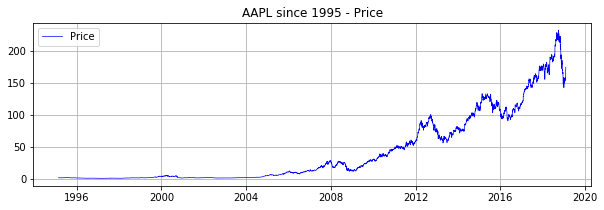

In [9]:
# Distribution of prices, daily returns, drawdowns
##### Plot price over time
rcParams['figure.figsize'] = 10, 3
plt_titles = ['AAPL since 1995']
for ds, t in zip(datasets, plt_titles):
    plt.plot(ds['price'], color='blue', linewidth=0.7)
    plt.grid()
    plt.legend(['Price'])
    plt.title(t + ' - Price')
    plt.show()

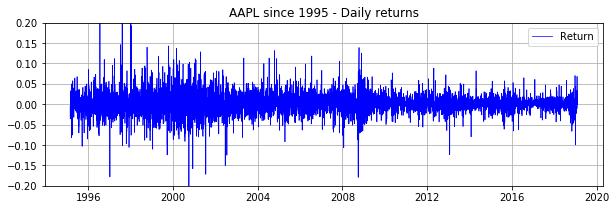

In [10]:
##### Plot daily return over time
for ds, t in zip(datasets, plt_titles):
    plt.plot(ds['ch'], color='blue', linewidth=0.7)
    plt.ylim(-0.2, 0.2)
    plt.grid()
    plt.legend(['Return'])
    plt.title(t + ' - Daily returns')
    plt.show()

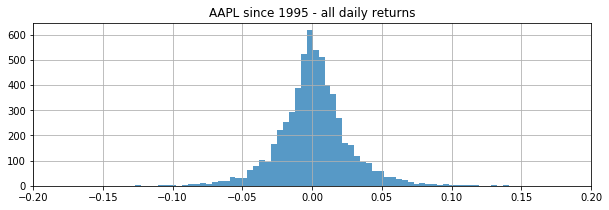

In [12]:
##### Plot distribution of daily returns
rcParams['figure.figsize'] = 10, 3
for ds, t in zip(datasets, plt_titles):
    plt.hist(ds['ch'], bins=200, rwidth=1, alpha=0.75)
    plt.xlim(-0.2, 0.2)
    plt.title(t + ' - all daily returns')
    plt.grid()
    plt.show()

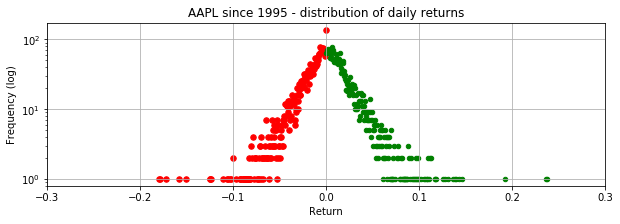

In [13]:
##### Plot log-distribution of daily returns
for ds, t in zip(datasets, plt_titles):
    max_return = max(abs(ds['ch']))
    m = round(max_return+0.01,2)
    bins = np.linspace(-m, m, 2000)
    d = {}
    for i in range(1, len(bins)+1):
        d[i] = bins[i-1]
    disc = np.digitize(x=ds['ch'], bins=bins)
    d1 = defaultdict(int)
    for i in disc:
        d1[d[i]] += 1
    df = pd.DataFrame(list(d1.items()))
    df.columns = ['return', 'n']
    df_neg = df[df['return']<0]
    df_neg = df_neg.sort_values(by='return', ascending=True).reset_index(drop=True)
    plt.scatter(df_neg['return'], df_neg['n'], s=30, color='red')
    plt.yscale('log')
    df_neg_reg = df_neg[df_neg['return']>-0.05]
    m, c = np.polyfit(df_neg_reg['return'], np.log(df_neg_reg['n']), 1)
    y_fit = np.exp(m*df_neg['return'] + c)
    plt.ylim(bottom=10**0)
    df_pos = df[df['return']>0]
    df_pos = df_pos.sort_values(by='return', ascending=False).reset_index(drop=True)
    plt.scatter(df_pos['return'], df_pos['n'], s=20, color='green')
    plt.yscale('log')
    df_pos_reg = df_pos[df_pos['return']<0.05]
    m, c = np.polyfit(df_pos_reg['return'], np.log(df_pos_reg['n']), 1)
    y_fit = np.exp(m*df_pos['return'] + c)
    plt.ylim(bottom=10**-0.1)
    plt.xlim(-0.3, 0.3)
    plt.title(t + ' - distribution of daily returns')
    plt.xlabel('Return')
    plt.ylabel('Frequency (log)')
    plt.grid()
    plt.show()
    plt.show()